In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
         
from keras.datasets import mnist

from keras.models import Sequential 
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

ERROR! Session/line number was not unique in database. History logging moved to new session 517


In [13]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
def plot_input_img(i):
    plt.imshow(X_train[i] ,cmap= 'gray')
    plt.title(y_train[i])
    plt.show()

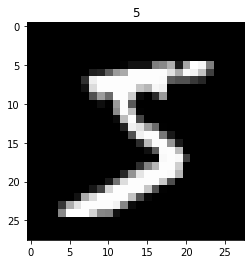

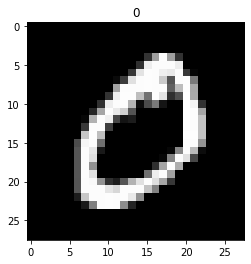

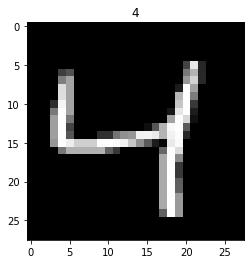

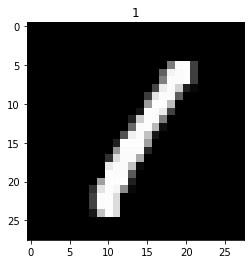

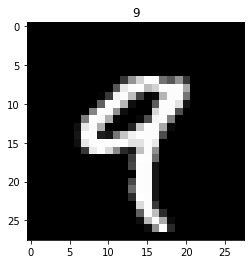

In [15]:
for i in range(5):
    plot_input_img(i)

In [16]:
#normalizing the image
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

#reshape/expand the dimension of images to(28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
#convert class to one hot vectors
y_train = keras.utils.np_utils.to_categorical(y_train)

y_test = keras.utils.np_utils.to_categorical(y_test)

In [19]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [22]:
# his = model.fit(X_train, y_train, epochs=10, validation_split= 0.3)
model.fit(x = X_train, y=y_train, validation_data = (X_test,y_test), batch_size=32, epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 477us/step - loss: 0.1651 - accuracy: 0.9498 - val_loss: 0.0586 - val_accuracy: 0.9815
Epoch 2/10
60000/60000 [==============================] - 40s 662us/step - loss: 0.0682 - accuracy: 0.9789 - val_loss: 0.0411 - val_accuracy: 0.9866
Epoch 3/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0350 - val_accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0330 - val_accuracy: 0.9892
Epoch 5/10
60000/60000 [==============================] - 41s 690us/step - loss: 0.0402 - accuracy: 0.9879 - val_loss: 0.0303 - val_accuracy: 0.9895
Epoch 6/10
60000/60000 [==============================] - 41s 691us/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0291 - val_accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] 

In [23]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

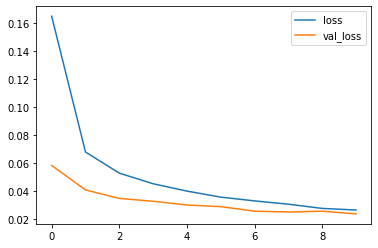

In [24]:
losses[['loss','val_loss']].plot()

In [25]:
accuracy = pd.DataFrame(model.history.history)

<AxesSubplot:>

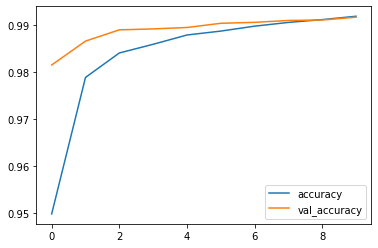

In [26]:
accuracy[['accuracy','val_accuracy']].plot()

In [27]:
model.save('Handwritten_digit.h5')

In [28]:
test_image= X_test[1]
test_image= test_image.reshape(1,28,28,1)
predicted_class = model.predict_classes(test_image,batch_size=1)
print("Predicted Class: ",str(predicted_class))

ERROR! Session/line number was not unique in database. History logging moved to new session 514
Predicted Class:  [2]


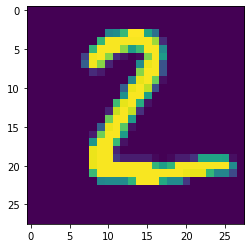

In [29]:
plt.imshow(X_test[1])

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03307789052953594
Test accuracy: 0.9894000291824341


In [35]:
from tkinter import *
import cv2
import numpy as np
from PIL import ImageGrab
from keras.models import load_model
import webbrowser

model = load_model('Handwritten_digit.h5')
image_folder = "img/"

root = Tk()
root.resizable(0, 0)
root.title("Digit Recognition System")

lastx, lasty = None, None
image_number = 0

cv = Canvas(root, width=800, height=600, bg='pink')
cv.grid(row=0, column=0, pady=2, sticky=NSEW, columnspan=2)


def clear_widget():
    global cv
    cv.delete('all')


def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y


def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y


cv.bind('<Button-1>', activate_event)

#mainloop() is used when your application is ready to run. 

def Recognize_Digit():
    global image_number
    filename = f'img_{image_number}.png'
    widget = cv

    x = root.winfo_rootx() + widget.winfo_rootx()
    y = root.winfo_rooty() + widget.winfo_rooty()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()
    print(x, y, x1, y1)

    # get image and save
    ImageGrab.grab().crop((x, y, x1, y1)).save(image_folder+filename)

    image = cv2.imread(image_folder + filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # make a rectangle box around each curve
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = th[y:y + h, x:x + w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        digit = padded_digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0

        pred = model.predict([digit])[0]
        final_pred = np.argmax(pred)

        data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'

        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)

    cv2.imshow('Predictions', image)
    cv2.waitKey(0)
    
    
#Add Buttons and Labels
def callback():
    webbrowser.open_new(r"https://docs.google.com/forms/d/1wom5mA0ZTaJJuSVsOWrEld--mY6-hXycCG_6rnxbbdQ/edit")    
btn_save = Button(text='Recognize Digits',width=15, height=3, command=Recognize_Digit)
btn_save.grid(row=2, column=0, pady=1, padx=1)
button_clear = Button(text='Clear Screen',width=15, height=3, command=clear_widget)
button_clear.grid(row=2, column=1, pady=1, padx=1)
button_info = Button(text='Feedback', width=15, height=2, command=callback)
button_info.grid(row=3, column=0, pady=1, padx=1)

    
root.mainloop()

ERROR! Session/line number was not unique in database. History logging moved to new session 521
328 296 1132 900
486 84 1290 688
486 84 1290 688
